In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\HP\Documents\GitHub\personal_doc_consultant\data\raw\Community Healthcare MultiSymptomsDisease Diagnostic Dataset.csv')

In [3]:
df.head()

,disease,symptom_cough,symptom_dry_cough,symptom_productive_cough,symptom_shortness_of_breath,symptom_wheezing,symptom_chest_tightness,symptom_sore_throat,symptom_runny_nose,symptom_nasal_congestion,...,rare_symptom_tall_stature_rare,rare_symptom_hyperextensible_skin_rare,rare_symptom_joint_hypermobility_rare,rare_symptom_macroglossia_rare,rare_symptom_hearing_loss_early_onset_rare,rare_symptom_developmental_delay_rare,rare_symptom_proximal_muscle_weakness_rare,rare_symptom_bulbar_symptoms_rare,rare_symptom_respiratory_failure_rare,rare_symptom_renal_cysts_rare
0,Hyperthyroidism,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Coronary_Artery_Disease,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Irritable_Bowel_Syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Irritable_Bowel_Syndrome,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Obesity,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df2=pd.read_csv(r'C:\Users\HP\Documents\GitHub\personal_doc_consultant\data\knowledge\perdoc2_specific_filled.csv')

In [5]:
df2.head()

,disease,discription,causes,remedy
0,Acute_Gastroenteritis,Sudden inflammation of stomach and intestines ...,"Commonly caused by rotavirus, norovirus, conta...","Rehydration therapy, electrolyte replacement, ..."
1,Amyotrophic_Lateral_Sclerosis,Progressive degeneration of motor neurons lead...,Mostly idiopathic; some cases linked to SOD1 o...,"Riluzole, edaravone, respiratory support, phys..."
2,Asthma,"Chronic airway inflammation causing wheezing, ...","Allergens, pollution, exercise, respiratory in...","Inhaled corticosteroids, bronchodilators, trig..."
3,Chronic_Kidney_Disease,Progressive loss of kidney function affecting ...,"Diabetes, hypertension, glomerulonephritis, po...","Blood pressure control, glucose control, dialy..."
4,Chronic_Liver_Disease,Long‑term liver damage causing fibrosis and im...,"Alcohol abuse, hepatitis B/C, fatty liver dise...","Avoid alcohol, antiviral therapy, weight loss,..."


In [8]:
print(df.shape, df.dtypes.head())
print(df['disease'].value_counts().head())

(100000, 175) disease                        object
symptom_cough                   int64
symptom_dry_cough               int64
symptom_productive_cough        int64
symptom_shortness_of_breath     int64
dtype: object
disease
Asthma                      21295
Hyperthyroidism             10747
Irritable_Bowel_Syndrome     9023
Obesity                      7853
Pneumonia                    6493
Name: count, dtype: int64


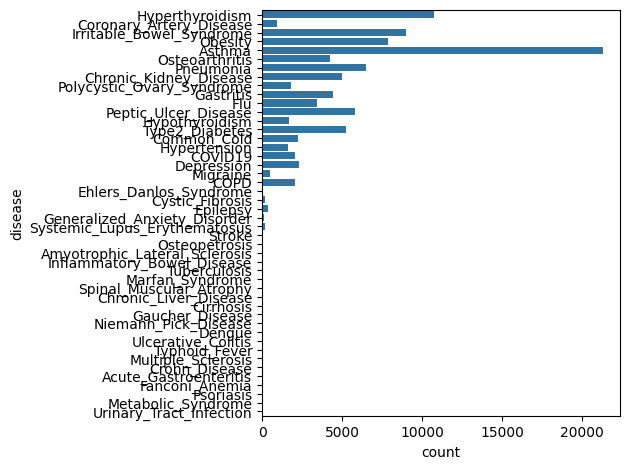

In [7]:
import seaborn as sns, matplotlib.pyplot as plt

sns.countplot(y=df['disease'])
plt.tight_layout(); plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['disease'])
y = df['disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

ValueError: The least populated classes in y have only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2. Classes with too few members are: ['Metabolic_Syndrome']